# 딥러닝 LSTM을 통한 regression 

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/Administrator/dataset/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [3]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [4]:
# One-hot encoding for the 'Sex' column
df_encoded = pd.get_dummies(df, columns=['Sex'])

# Display the first few rows after encoding
df_encoded.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
id,,,,,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [5]:
df = df.dropna()
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [6]:
X=df_encoded.drop('Rings',axis=1)
X.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
id,,,,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0


In [7]:
y=df_encoded['Rings']
y.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

In [10]:
# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# 시계열 데이터로 변환하는 함수 정의
def create_sequences(X, y, n_steps):
    X_seq, y_seq = [], []
    for i in range(len(X) - n_steps):
        X_seq.append(X[i:i+n_steps])  # n_steps 크기로 자르기
        y_seq.append(y[i+n_steps])    # 다음 값을 예측
    return np.array(X_seq), np.array(y_seq)

n_steps = 3  # timesteps 설정

In [12]:
# 시계열 데이터로 변환
X_seq, y_seq = create_sequences(X_scaled, y, n_steps)

In [13]:
# 데이터셋 분리 (학습용/테스트용)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Normalize the data (CNN and LSTM models often perform better with normalized data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# 차원 확인
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (3341, 10)
X_test shape: (836, 10)


In [17]:
import numpy as np

# X_train과 X_test를 NumPy 배열로 변환
X_train_np = X_train.values  # X_train이 DataFrame인 경우
X_test_np = X_test.values    # X_test가 DataFrame인 경우

# 3차원으로 변환
X_train_reshaped = np.reshape(X_train_np, (X_train_np.shape[0], 1, X_train_np.shape[1]))
X_test_reshaped = np.reshape(X_test_np, (X_test_np.shape[0], 1, X_test_np.shape[1]))


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# LSTM 모델 구축
lstm_model = Sequential()

# LSTM 레이어 추가
lstm_model.add(LSTM(64, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=False))

# 중간 레이어 추가 (선택 사항)
lstm_model.add(Dropout(0.5))  # 과적합 방지를 위한 드롭아웃

# 출력 레이어 추가 (회귀를 위한 1개의 뉴런)
lstm_model.add(Dense(1))

# 모델 컴파일 (회귀를 위한 손실 함수 mse)
lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 모델 구조 확인
lstm_model.summary()


C:\ProgramData\Anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          19,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,265 (75.25 KB)

 Trainable params: 19,265 (75.25 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# 모델 학습
model_history = lstm_model.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, validation_data=(X_test_reshaped, y_test))

Epoch 1/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 100.3698 - mae: 9.5318 - val_loss: 61.8820 - val_mae: 7.3255
Epoch 2/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 42.3155 - mae: 5.7499 - val_loss: 10.8505 - val_mae: 2.4436
Epoch 3/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 12.9279 - mae: 2.7070 - val_loss: 9.5891 - val_mae: 2.1927
Epoch 4/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 11.3862 - mae: 2.4806 - val_loss: 8.7098 - val_mae: 2.0670
Epoch 5/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 11.2579 - mae: 2.4300 - val_loss: 8.1226 - val_mae: 1.9662
Epoch 6/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 10.1408 - mae: 2.3118 - val_loss: 7.6162 - val_mae: 1.8967
Epoch 7/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9.3186 - mae: 2.2209 - val_loss: 7.1085 - val_mae: 1.8988
Epoch 8/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.9927 - mae: 2.2041 - val_loss: 6.8471 - val_mae: 1.8497
Epoch 9/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms

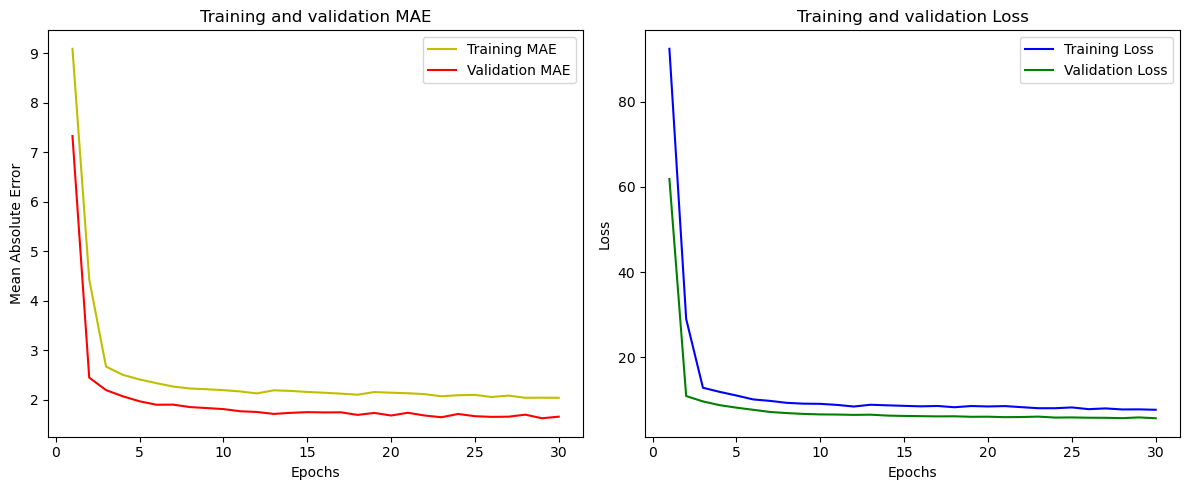

In [21]:
# MAE 그래프
mae = model_history.history['mae']
val_mae = model_history.history['val_mae']
epochs = range(1, len(mae) + 1)  # epochs 범위 설정

# 손실 그래프
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

plt.figure(figsize=(12, 5))

# MAE 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, mae, 'y', label='Training MAE')
plt.plot(epochs, val_mae, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [22]:
# 필요한 라이브러리 임포트
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# X_test_scaled의 형태를 (배치 크기, time_steps, features)로 변경합니다.
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# 모델을 사용하여 예측 수행
y_pred = lstm_model.predict(X_test_scaled)

# 예측값의 형태 확인
print(f'y_pred shape: {y_pred.shape}')

# 예측값을 1차원으로 변환
y_pred = y_pred.flatten()

# y_test를 numpy 배열로 변환하고 1차원으로 변환
y_test = np.array(y_test).flatten()

# 예측값을 평가합니다.
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
y_pred shape: (836, 1)
Mean Squared Error: 73.54941139451043
Mean Absolute Error: 7.357564379724018
R^2 Score: -5.7942710658712375


Mean Squared Error (MSE): 73.55
- MSE는 예측값과 실제값 간의 제곱 오차의 평균입니다. 값이 낮을수록 모델의 예측이 실제값에 가깝다는 것을 의미합니다.

Mean Absolute Error (MAE): 7.36
- MAE는 예측값과 실제값 간의 절대 오차의 평균입니다. 값이 낮을수록 모델의 예측 정확도가 높습니다.

R² Score: -5.79
- R² 값은 모델이 데이터의 변동성을 얼마나 설명하는지를 나타내는 지표로, 0에서 1 사이의 값을 가집니다. 0은 모델이 예측에서 아무런 설명력을 가지지 못함을 의미하고, 1은 완벽한 예측을 의미합니다. 음수의 경우, 모델이 단순히 평균값으로 예측하는 것보다도 더 나쁜 성능을 보이고 있다는 것을 나타냅니다.

종합 평가
- MSE와 MAE는 비교적 낮은 편이지만, R² Score가 -5.79인 것은 모델이 성능이 매우 좋지 않다는 것을 의미합니다. 특히, R²가 음수인 것은 모델이 데이터의 변동성을 설명하지 못하고 있다는 신호입니다. 이는 모델이 학습하는 데 문제가 있거나, 입력 데이터가 예측해야 할 타겟 값과 제대로 연결되지 않을 때 발생할 수 있습니다.